In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]


### Cargamos el dataset

In [3]:
df = pd.read_csv('Data/titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

### Creamos un modelo

In [4]:
target = 'Survived'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
probabilidades = model.predict_proba(X_test)[:, 1]


### Matriz de confusion

|                     | **Predicho Positivo** | **Predicho Negativo** |
|---------------------|-----------------------|-----------------------|
| **Real Positivo**   | True Positives (TP) | False Negatives (FN) |
| **Real Negativo**   | False Positives (FP) | True Negatives (TN) |


- TP (Verdaderos Positivos): Casos positivos correctamente clasificados.

- FN (Falsos Negativos): Casos positivos incorrectamente clasificados como negativos.

- FP (Falsos Positivos): Casos negativos incorrectamente clasificados como positivos.

- TN (Verdaderos Negativos): Casos negativos correctamente clasificados.

In [6]:
# Crea una matriz de confusión con Sklearn
from sklearn.metrics import confusion_matrix
predicciones = model.predict(X_test)

matriz_confusion = confusion_matrix(y_test, predicciones)


### Sensitivity 

Dentro de los que si sobreviven, que porcentaje predice bien el modelo

$$\text{Sensitivity} = \frac{\text{True positive (TP)}}{\text{True positive (TP)} + \text{False Negative (FN)}}$$

In [8]:
TP = matriz_confusion[0, 0]
FN = matriz_confusion[0, 1]

TP / (TP + FN)

0.8511904761904762

### Especificidad 

De los que no sobreviven, que porcentaje predice bien el modelo 

$$\text{Specificity} = \frac{\text{True Negative (TN)}}{\text{True Negative (TN)} + \text{False Positive (FP)}}$$


In [9]:
TN = matriz_confusion[1, 1]
FP = matriz_confusion[1, 0]

TN / (TN + FP)

0.72

### Recrea la matriz de confusión, calcula sensitivity y specificity con un corte de 0.7

In [11]:
predicciones1 = probabilidades > 0.7

matriz_confusion1 = confusion_matrix(y_test, predicciones1)
matriz_confusion1

array([[162,   6],
       [ 50,  50]])

In [12]:
# Sensitivity = TP / (TP + FN)
TP = matriz_confusion1[0, 0]
FN = matriz_confusion1[0, 1]

TP / (TP + FN)

0.9642857142857143

In [13]:
# Specificity = TN / (TN + FP)
TN = matriz_confusion1[1, 1]
FP = matriz_confusion1[1, 0]

TN / (TN + FP)

0.5

### Siempre habrá un balance entre sensitivity y specificity en la elección de los cortes 



In [15]:
# Calcular para varios valores 
valores = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sencitivity = []
specificity = []

for i in valores:
    predicciones = probabilidades > i
    matriz_confusion = confusion_matrix(y_test, predicciones)

    TP = matriz_confusion[0, 0]
    FN = matriz_confusion[0, 1]
    TN = matriz_confusion[1, 1]
    FP = matriz_confusion[1, 0]

    sen = TP / (TP + FN)
    spe = TN / (TN + FP)

    sencitivity.append(sen)
    specificity.append(spe)

In [16]:
specificity_minus = [1 - i for i in specificity]

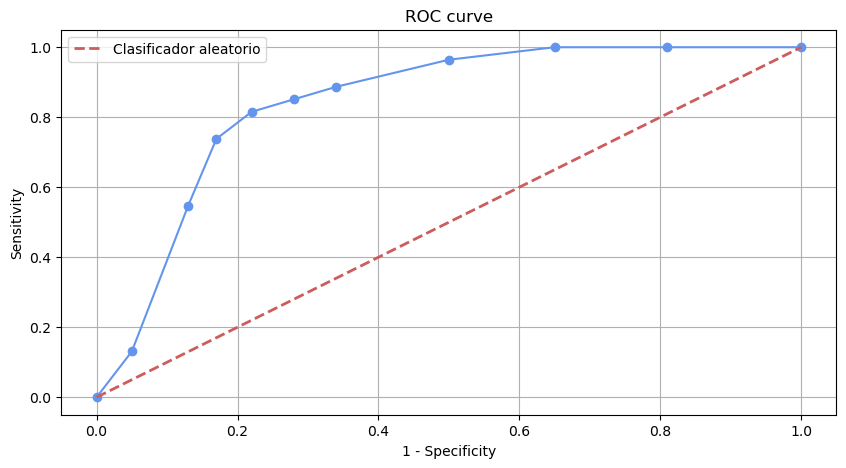

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(specificity_minus, sencitivity, marker='o', color=colors[0])
plt.plot([0, 1], [0, 1], color=colors[1], linestyle='--', lw=2, label='Clasificador aleatorio')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.grid()
plt.legend()
plt.show()

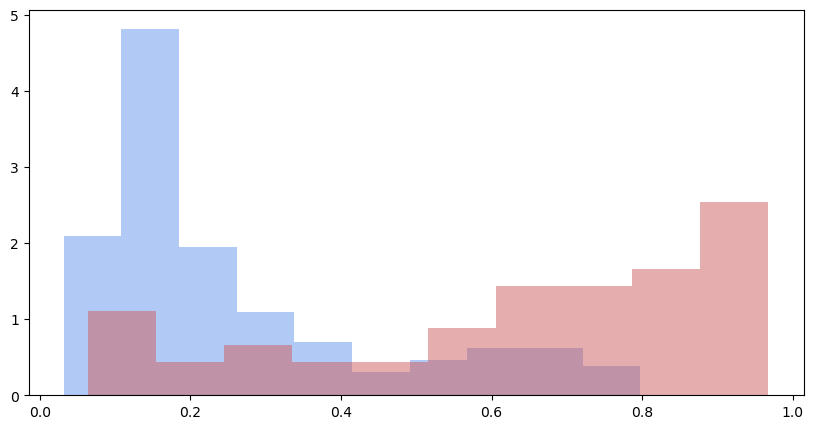

In [27]:
df = pd.DataFrame({
     'y': y_test,
     'probabilidades': probabilidades
})

plt.figure(figsize=(10, 5))
plt.hist(df[df.y ==0].probabilidades, alpha=0.5, color=colors[0], density=True)
plt.hist(df[df.y ==1].probabilidades, alpha=0.5, color=colors[1], density=True)
plt.show()

### Utiliza sklearn para obtener esta curva

In [28]:
from sklearn.metrics import roc_curve

fpr, fnp, scores = roc_curve(y_score=probabilidades, y_true=y_test)

In [31]:
import random

In [33]:
probabilidades1 = [random.random() for _ in range(len(y_test))]
fpr1, fnp1, scores1 = roc_curve(y_score=probabilidades1, y_true=y_test)

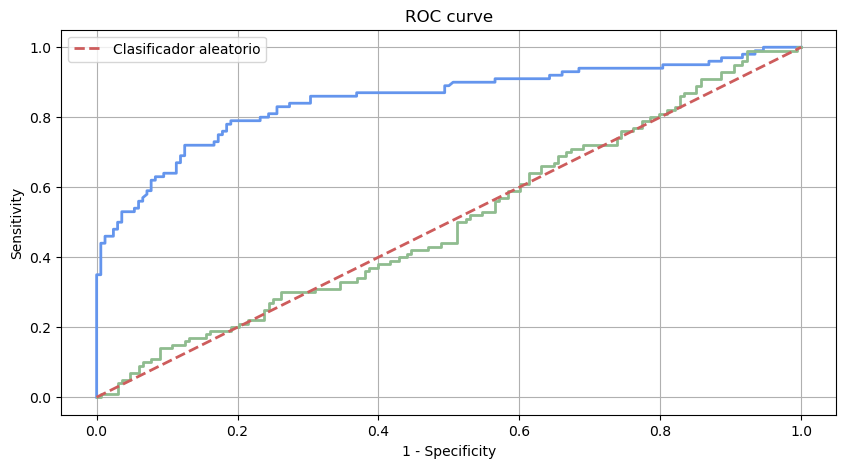

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, fnp, color=colors[0], lw=2)
plt.plot(fpr1, fnp1, color=colors[2], lw=2)
plt.plot([0, 1], [0, 1], color=colors[1], linestyle='--', lw=2, label='Clasificador aleatorio')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.grid()
plt.legend()
plt.show()

### Definición, el AUC es el área del gráfico anterior que está bajo la linea (área bajo la curva)

Si se toman dos datos al azar, uno que sobrevive y otro que no sobrevive, ¿cuál es la probabilidad de que el que sobrevive tenga mayor probabilidad predicha?



In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_score=probabilidades, y_true=y_test)

0.8507738095238095

In [36]:
roc_auc_score(y_score=probabilidades1, y_true=y_test)

0.5049404761904762

In [37]:
# Gini = 2 * AUC - 1

2 * roc_auc_score(y_score=probabilidades, y_true=y_test) - 1

0.7015476190476191

### Calcula el AUC de una regresión polinomial grado 2

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("model", linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)

probabilidades_modelo2 = pipeline.predict_proba(X_test)[:, 1]

# Calcula el AUC


0.8545833333333334

### Compara las dos ROC curves

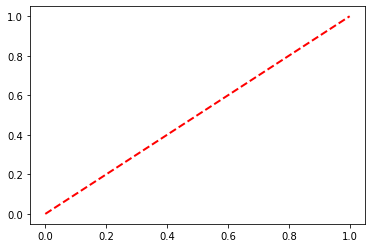

In [15]:
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')

### KNN clasificación, cross validation de vecions más cercanos con AUC

In [38]:
from sklearn import neighbors

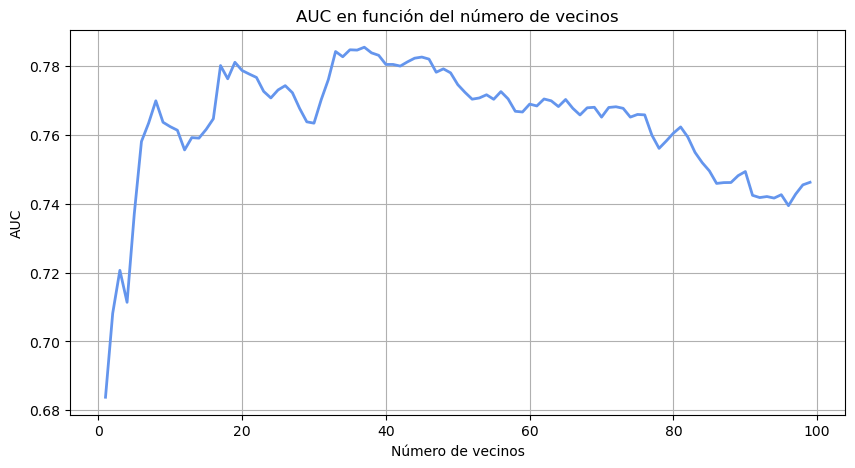

In [41]:
vecinos = []
auc = []

for i in range(1, 100):
     model = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
     probabilidades = model.predict_proba(X_test)[:, 1]
     vecinos.append(i)
     auc.append(roc_auc_score(y_score=probabilidades, y_true=y_test))

plt.figure(figsize=(10, 5))
plt.plot(vecinos, auc, color=colors[0], lw=2)
plt.xlabel('Número de vecinos')
plt.ylabel('AUC')
plt.title('AUC en función del número de vecinos')
plt.grid()